In [53]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt


In [54]:
df=pd.read_csv("../Files/rock_density_xray.csv")

In [55]:
df

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


In [56]:
df.columns=["Signal","Density"]

In [57]:
df

,Signal,Density
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374
...,...,...
295,0.700227,2.112965
296,58.586585,2.000293
297,54.674548,1.879181
298,15.162434,2.644990


<AxesSubplot: xlabel='Signal', ylabel='Density'>

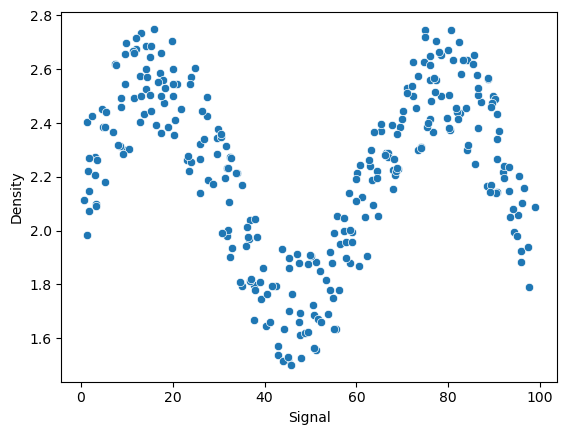

In [58]:
sb.scatterplot(data=df,x="Signal",y="Density")

In [59]:
X=df["Signal"].values.reshape(-1,1)
y=df["Density"]

In [60]:
from sklearn.model_selection import train_test_split


In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [62]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [63]:
def run_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    
    prediction = model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,prediction))
    
    print(f"RMSE={rmse}")
    
    
    signal_range=np.arange(0,100)
    output=model.predict(signal_range.reshape(-1,1))
    
    sb.scatterplot(x="Signal",y="Density",data=df,color="black")
    plt.plot(signal_range,output)

In [64]:
from sklearn.pipeline import make_pipeline

In [65]:
from sklearn.preprocessing import PolynomialFeatures

In [66]:
from sklearn.linear_model import LinearRegression

In [67]:
pipe=make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

RMSE=0.1380752521530322


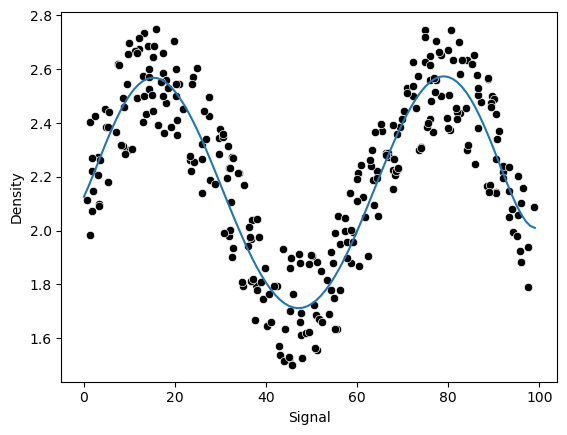

In [68]:
run_model(pipe,X_train,y_train,X_test,y_test)

In [69]:
from sklearn.ensemble import RandomForestRegressor

In [70]:
rfr=RandomForestRegressor(n_estimators=10)

RMSE=0.15083937188900892


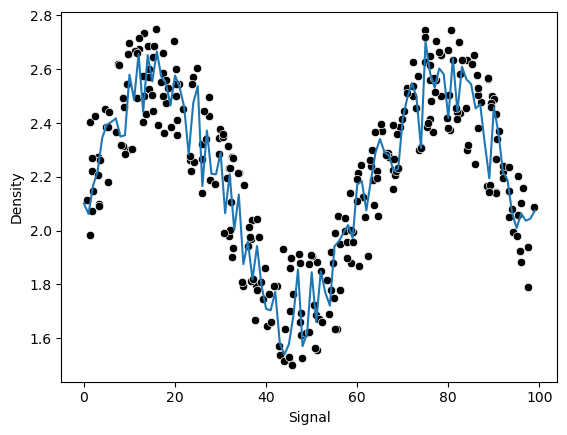

In [71]:
run_model(rfr,X_train,y_train,X_test,y_test)